In [1]:
import numpy as np
from utils import plot_values
from gridworld import GridworldEnv

In [2]:
# init the environment
env = GridworldEnv(shape=[4,4])

In [3]:
# check number of states and actions
print('Number of states in the environment:', env.nS)
print('Number of actions in the environment:', env.nA)

print('\nEnv:')
env._render(mode='human', close=False)

Number of states in the environment: 16
Number of actions in the environment: 4

Env:
T  o  o  o
o  o  o  x
o  o  o  o
o  o  o  T


In [4]:
def eval_policy(policy, env, discount_factor=1.0, epsilon=1e-5):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    
    # start with a random (all 0) value function
    V_old = np.zeros(env.nS)
    
    while True:
        
        # init new value function which is initially zeros
        V_new = np.zeros(env.nS)
        
        # stop condition
        delta = 0
        
        # loop over state space:
        for s in range(env.nS):
            
            # to accumulate Bellman expectation equation
            v_fn = 0
            
            # get probability distribution over actions
            action_probs = policy[s]
            
            # loop over possible actions
            for a in range(env.nA):
                
                # get transitions
                [(prob, next_state, reward, done)]  = env.P[s][a]
                
                # apply iterative update to every single state using Bellman expectation equation
                v_fn += action_probs[a] * (reward + discount_factor * V_old[next_state])
            
            # get the biggest difference over state space
            delta = max(delta, abs(v_fn - V_old[s]))
            
            # update state-value
            V_new[s] = v_fn
            
        # set the new value function
        V_old = V_new
        
        # if true value function
        if (delta < epsilon): break
            
    return np.array(V_old)

In [5]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
print('Uniform Random Policy:')
print(random_policy)

Uniform Random Policy:
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [6]:
V = eval_policy(random_policy, env) # compute new value function to find better policies
expected_V = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0]) # this expected value calculated manually by human

Reshaped Grid State-Value Function:


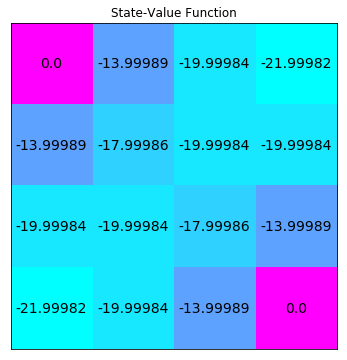

In [7]:
print('Reshaped Grid State-Value Function:')
plot_values(V.reshape(env.shape), name='State-Value', shape=(4,4))

## Check The Policy

Reshaped Grid Expected State-Value Function:


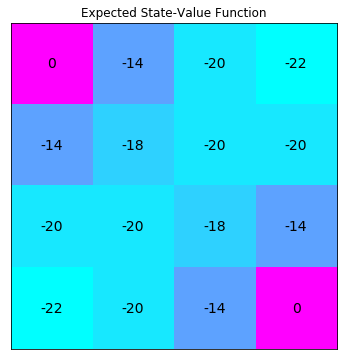

In [8]:
print('Reshaped Grid Expected State-Value Function:')
plot_values(expected_V.reshape(env.shape), name='Expected State-Value', shape=(4,4))

In [9]:
np.testing.assert_array_almost_equal(V, expected_V, decimal=2) # assert the value result
print(np.floor(V) == expected_V)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


---